In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import utils
import copy

In [2]:
def convolve_im(im: np.array,
                fft_kernel: np.array,
                verbose=True):
    """ Convolves the image (im) with the frequency kernel (fft_kernel),
        and returns the resulting image.

        "verbose" can be used for turning on/off visualization
        convolution

    Args:
        im: np.array of shape [H, W]
        fft_kernel: np.array of shape [H, W] 
        verbose: bool
    Returns:
        im: np.array of shape [H, W]
    """
    ### START YOUR CODE HERE ### (You can change anything inside this block)
    size_im = len(im)

    # # Zero padd input image (NOT NEEDED HERE APPARENTLY)
    # new_size_im = 2*size_im
    # temp = np.zeros([2*size_im, 2*size_im])
    # for row in range(size_im):
    #     for col in range(size_im):
    #         temp[row][col] = im[row][col] * pow(-1,row+col)

    # Calculate fft of image
    # fft_im = np.fft.fft2(temp)
    fft_im = np.fft.fftshift(np.fft.fft2(im)) # Use fftshift or multiply with pow(-1,row+col)
    initial_fft_im = copy.deepcopy(fft_im)

    
    # # Checks if filter is high or lowpass (NOT NEEDED HERE APPARENTLY)
    # if fft_kernel[0,0] == 1:
    #     # Lowpass
    #     kernel_padded = np.zeros([2*size_im, 2*size_im])
    # else:
    #     kernel_padded = np.ones([2*size_im, 2*size_im])
    # # Padd kernel
    # kernel_size = len(fft_kernel)
    # middle = new_size_im/2
    # fft_kernel = np.fft.fftshift(fft_kernel)
    # for row in range(kernel_size):
    #     for col in range(kernel_size):
    #         kernel_width = (kernel_size-1)/2
    #         pos_x = int(middle+row-kernel_width)
    #         pos_y = int(middle+col-kernel_width)
    #         kernel_padded[pos_x][pos_y] = fft_kernel[row][col]
    # fft_kernel = kernel_padded
    
    fft_kernel = np.fft.fftshift(np.fft.fft2(fft_kernel))
    size_fft = len(fft_im)
    # Kernel and image multiplication
    for row in range(size_fft):
        for col in range(size_fft):
            fft_im[row][col] *= fft_kernel[row][col]

    conv_result = (np.abs(np.fft.ifft2(fft_im)))[:size_im,:size_im]

    # Plot FFTs and images
    if verbose:
        # Use plt.subplot to place two or more images beside eachother
        plt.figure(figsize=(20, 4))
        # plt.subplot(num_rows, num_cols, position (1-indexed))
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap="gray")
        
        plt.subplot(1, 5, 2) 
        plt.imshow(np.log1p(np.abs(initial_fft_im)), cmap="gray") # Visualize FFT

        plt.subplot(1, 5, 3)
        plt.imshow(np.log1p(np.abs(fft_kernel)), cmap="gray") # Visualize FFT kernel

        plt.subplot(1, 5, 4)
        plt.imshow(np.log1p(np.abs(fft_im)), cmap="gray") # Visualize filtered FFT image

        plt.subplot(1, 5, 5) 
        plt.imshow(conv_result, cmap="gray") # Visualize filtered spatial image

    ### END YOUR CODE HERE ###
    return conv_result

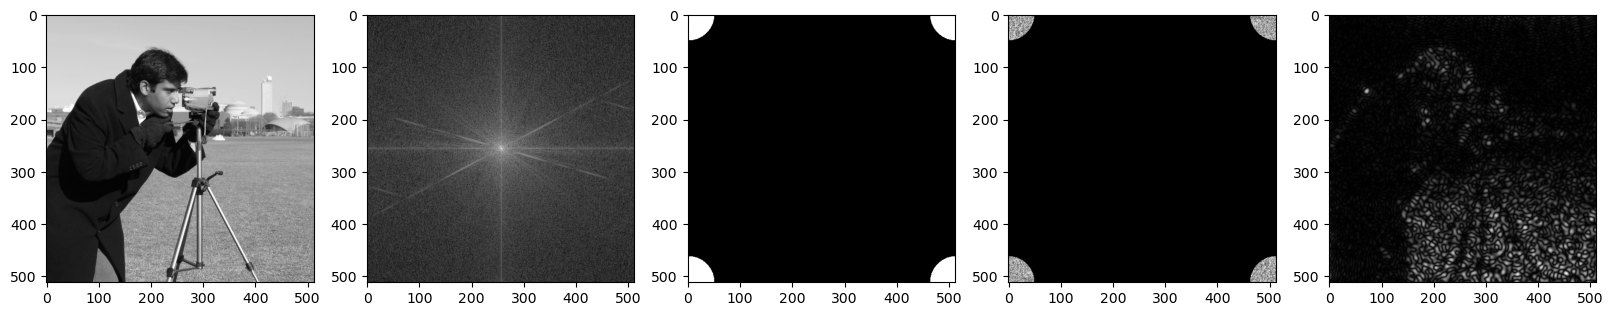

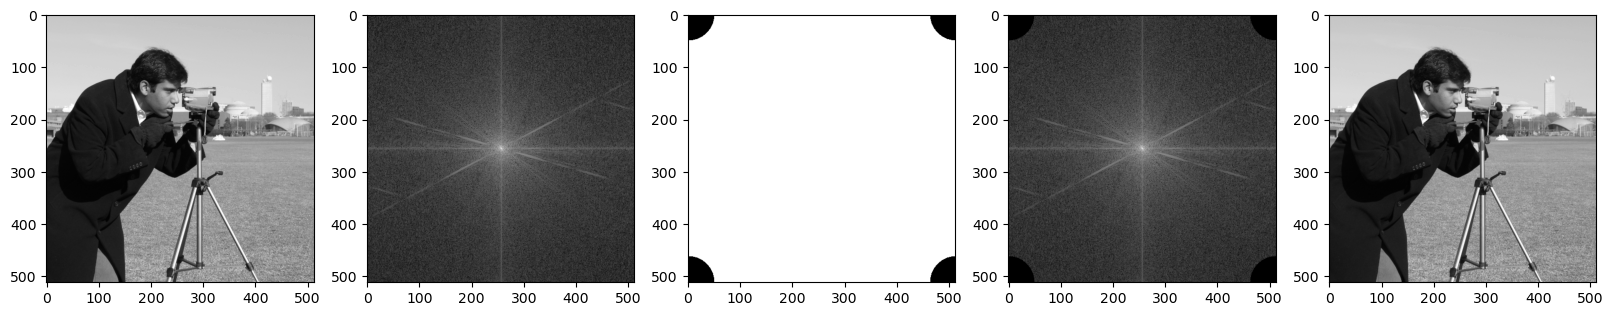

Saving image to: image_processed\camera_low_pass.png
Saving image to: image_processed\camera_high_pass.png


c:\Users\olofl\Documents\Programmering\TDT4195\ip\assignment2\utils.py:96: UserWarning: image_processed\camera_low_pass.png is a low contrast image
  skimage.io.imsave(impath, im)
c:\Users\olofl\Documents\Programmering\TDT4195\ip\assignment2\utils.py:84: UserWarning: Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)
  warnings.warn("Image min/max is outside the range [0.0, 1.0]. Squashing the image to this range. (Can be safely ignored)")


In [3]:
if __name__ == "__main__":
    verbose = True
    # Changing this code should not be needed
    im = skimage.data.camera()
    im = utils.uint8_to_float(im)
    # DO NOT CHANGE
    frequency_kernel_low_pass = utils.create_low_pass_frequency_kernel(im, radius=50)
    image_low_pass = convolve_im(im, frequency_kernel_low_pass,
                                 verbose=verbose)
    # DO NOT CHANGE
    frequency_kernel_high_pass = utils.create_high_pass_frequency_kernel(im, radius=50)
    image_high_pass = convolve_im(im, frequency_kernel_high_pass,
                                  verbose=verbose)

    if verbose:
        plt.show()
    utils.save_im("camera_low_pass.png", image_low_pass)
    utils.save_im("camera_high_pass.png", image_high_pass)